In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import sys 
import numpy.ma as ma
import scipy.stats as st
import scipy.signal as si
from astropy.io import fits
from astropy.table import Table
import scipy.ndimage.morphology as morph
from matplotlib.backends.backend_pdf import PdfPages
from scipy import ndimage as ndi
import matplotlib

import time
import seg_OTMF as sot
import parameters


%matplotlib inline
%reload_ext autoreload

In [3]:
#sys.path.insert(0,'./libext/mpdaf-master/')
import mpdaf

from mpdaf.obj import WCS
from mpdaf.obj import WaveCoord
from mpdaf.obj import Image
from mpdaf.obj import Spectrum
from mpdaf.obj import Cube


from mpdaf.sdetect import Source, SourceList
from mpdaf.sdetect import Catalog

In [4]:
cube = Cube('./data/DATACUBE_UDF-10.fits')
cube.info()

[INFO] 3681 x 322 x 323 Cube (./data/DATACUBE_UDF-10.fits)
INFO:mpdaf.obj.data:3681 x 322 x 323 Cube (./data/DATACUBE_UDF-10.fits)
[INFO] .data(3681 x 322 x 323) (1e-20 erg / (Angstrom cm2 s)), .var(3681 x 322 x 323)
INFO:mpdaf.obj.data:.data(3681 x 322 x 323) (1e-20 erg / (Angstrom cm2 s)), .var(3681 x 322 x 323)
[INFO] center:(-27:46:43.6667,03:32:38.6806) size in arcsec:(64.400,64.600) step in arcsec:(0.200,0.200) rot:-0.0 deg
INFO:mpdaf.obj.coords:center:(-27:46:43.6667,03:32:38.6806) size in arcsec:(64.400,64.600) step in arcsec:(0.200,0.200) rot:-0.0 deg
[INFO] wavelength: min:4750.00 max:9350.00 step:1.25 Angstrom
INFO:mpdaf.obj.coords:wavelength: min:4750.00 max:9350.00 step:1.25 Angstrom


In [5]:
cat = Catalog.read('./data/udf10_c031_e026_withz.vot')

cat_lya=cat[cat['TYPE']==6]

/home/miv/courbot/anaconda/lib/python2.7/site-packages/astropy/table/column.py:1095: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


In [6]:
cat_lya[cat_lya['CONFID']>1]['ID'].shape

(157,)

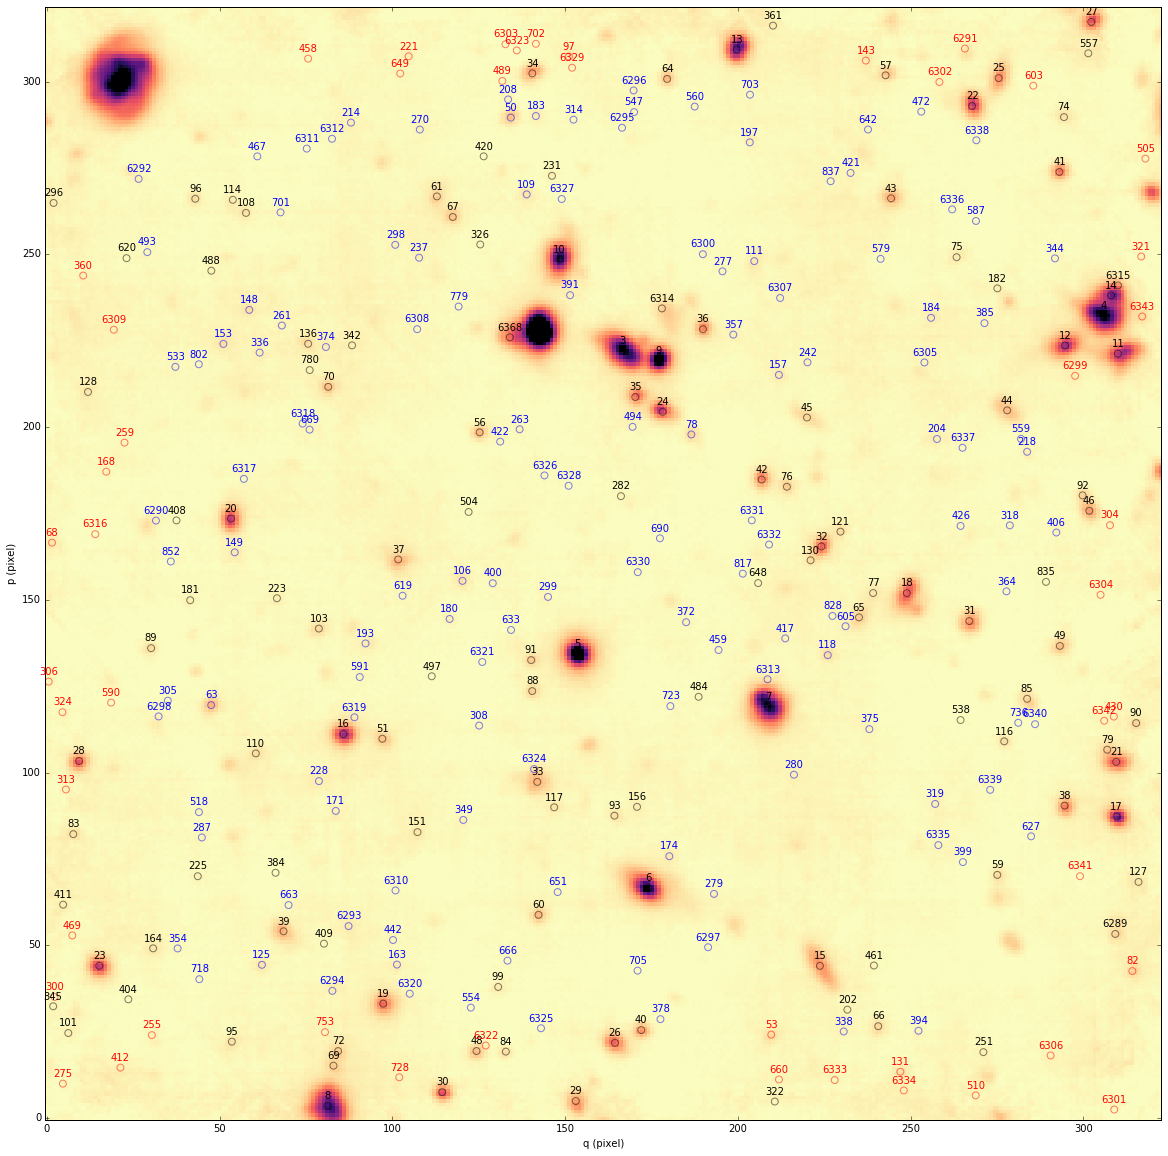

In [7]:
cat_lya=cat[cat['TYPE']==6]

im_cube = cube.mean(axis=0)
id_nobor = np.abs(cat_lya.edgedist(wcs=im_cube.wcs))>25*0.2
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(1,1,1)

im_cube.plot(vmin=0,vmax=5,cmap='magma_r')
cat[cat['TYPE']!=6].plot_id(ax,im_cube.wcs)
cat_lya[id_nobor].plot_id(ax,im_cube.wcs,col='blue')

cat_lya[id_nobor==0].plot_id(ax,im_cube.wcs,col='red')

In [8]:
#liste v0 au 12 septembre
#liste_id = (78,149,153,157,183,208,214,237,547,619,802,828,6311,6312,6295)
#liste_id = (78,149,153,157,183,208,214,237,547,619,802,828,6295)
#liste_id = cat_lya[id_nobor]['ID']
liste_id = cat_lya['ID']
liste_obj_bor = cat_lya[id_nobor==0]['ID']
#listeciel = (308,354,560,587,666,852,6312,6313,6319,6324,6326)
#listeechec=(193,  227,  228,  287 , 349 , 394 , 406 , 421,  493,  518 , 533 , 663 , 690 , 705,  779, 6300 ,6305 ,6318, 6328, 6332 ,6338 )
#listeciel = (308, 354, 417,459,518,587,701,718,852,6311,6312,6313,6317,6326,6332, 259,728,)
#listeechec = (193,228,270,287,338,349,375,472,493,533,560,651,663,779,817,6300,6305,6318,6319,6330,6338, 131,221,304,321,458,590,603,649,6306,6309,6322,6333,6334,300)
# attention aux bords la distinction n'est plus faite entre ciel et echec

###################
# Listes variées
#liste_ok = (63,78,82,109,143,148,149,163,183,204,208,214,218,237,261, 275,298,306,324,344,360,378,391,399,400,494,510,559,660,828, 6290,6293,6297,6298,6299,6303,6304,6316,6323,6327)
#taille80 = (106,109,111,118,143,153,168,180,261,277,279,299,305,306, 313,314,318,344,364,374,399,422,459,489,547,633,666,723,6291,6298, 6301,6313,6316,6339,6340,6343,)
#taille80_bis = (242,321,412,467,590,591,669,736,802,6295,6300,6308,6311,6333, 6342)


taille40 = (6318,6337,6341,666,)

taille50 = (263,308,385,469,579,605,619,702,703,6319,6324,6325,305)

taille100 = (111,153,277,314,357,442,718,6294,6335)

taille70 = (106,430,642,118,279,313,318,374,489,633,723,6291,6313)


taille40 = (263,385,605,703,6325)

taille50 = (263,308,385,469,579,605,619,702,703,6319,6324,6325,305)

taille100 = (111,153,277,314,357,442,718,6294,6335,255,6311,579)

taille70 = (106,430,642,118,279,313,318,374,489,633,723,6291,6313)

taille35 = (6318,6341)


lambda_coupe_droite_5 = (171,255,426,505,6334,627,705,6305,255)
lambda_plus_7 = (417,852,6321)
lambda_coupe_droite_gauche_5 = (336,) 
lambda_plus_large = (50,97,6329,)

taille80 = (171,426,627)
taille50=(6318,6341,279,718,255,)
taille100=(106,633,)
taille40=(318,374,6334,417)
taille120 = (153,111,277,314,6294,6311)

liste_a_proc = taille120+taille100+taille80+taille40+taille50


#liste_a_proc = taille35+taille40+taille70+taille100#+taille100+taille70

#liste_a_proc = taille40+taille50


###########

liste_echec = (184,125,193,270,287,300,319,338,349,372,375,394,406,421,458,459,472,493,533,560,649,651,663,779,817,837,6307,6320,6322,6301,6338,6343)

liste_ciel = (168,259,304,354,418,518,587,603,701,791,728,6306,6309,6312,6317,6326,6331,6332,6339)

In [9]:
len(liste_a_proc)

20

In [18]:
sourcelist = list()
for id in (308,):#liste_obj_bor:#(579,651,171,6319,6335):#(263,171,197,605,627):#(6311,214,579,385,6317,718,308,6294,442,6313,6324,):#liste_id:

    src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
    sourcelist.append(src)



nb_level_x = 1
x_range = np.arange(0, 1+1./nb_level_x, 1./nb_level_x)

pas = np.pi/2
v_range = np.arange(pas/2., np.pi, pas)

for src in sourcelist:#(sourcelist[88],sourcelist[128], sourcelist[93], sourcelist[42],):#(sourcelist[3],):

    #src = Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
    print 'Traitement source numero '+str(src.id)
    cube = src.cubes['CUBE_MS']
    
    #datacube to proceed
    Y = np.swapaxes(cube.data.data,2,0)
    Ymax = Y.max()
    Y=Y/Ymax
    
    S0,S1,W = Y.shape

    pargibbs = parameters.ParamsGibbs(S0 = S0,                              S1 = S1,
                                 type_pot = 'potts',                              phi_uni = 0.,
                                 thr_conv=0.001,                             nb_iter=100,
                                 fuzzy=False,                             anisotropic=True,   
                                 angle=np.zeros(shape=(S0,S1)),
                                 beta = 1.,                             phi_theta_0 = 0.,
                                 alpha =5,                             alpha_v = 10,
                                 delta = 0.,                             init_method = 'std',
                                 nb_fuzzy = 256. ,                             v_range = v_range,
                                 x_range = x_range                             )# beta=1.25,

    pargibbs.S0 = S0
    pargibbs.S1 = S1
    pargibbs.W = W

    pargibbs.Y = Y



    #==============================================================================
    # Paramètres à fixer
    #==============================================================================

    incert = True # Utilisation ou non de segmentation avec incertitude

    parseg = parameters.ParamsSeg(nb_iter_sem=40,
                                  seuil_conv = 5./(S0*S1),
                                  incert = incert
                                    )

    parseg.multi = False # le multiclasse discret
    parseg.nb_rea = 200
    parseg.taille_fen=10
    parseg.seuil_conv = 0.05

            

    #
    ##==============================================================================
    ## Segmentation HMF
    ##==============================================================================
    parseg.tmf = False
    
    # masque de segmentation: 
    # option (a) on ignore les parties les plus brillantes pour l'estimation des parametres
    #im_wh = cube.mean(axis=0)
    #parseg.weights= (im_wh.data <0.5).astype(float).T
    
    # option (b) dans un certain rayon wrt centre
    #x,y=np.ogrid[0:Y.shape[0],0:Y.shape[1]]
    #c = np.array([Y.shape[0]/2, Y.shape[1]/2])
    #r = np.sqrt( (x-c[0])**2 + (y-c[1])**2)
    #rmax = r.max()
    #parseg.weights = (r < rmax/3.).astype(float)
    
    # option (c) on fait de la morphomat sur les flux seuilles
    #im_wh = cube.mean(axis=0)
    #flux_seuil =  (im_wh.data <1.0)
    #flux_tr = morph.binary_erosion(flux_seuil,iterations=2,border_value=1).astype(float).T
    #parseg.weights= flux_tr
    #parseg.weights[r<7.]=1. # definir mieux, si on garde; Avec la FWHM par ex.
    
    parseg.weights=np.ones(shape=(Y.shape[0],Y.shape[1]))
    
    try:
        print '---------------HMF---------------------'
        start = time.time()

        parseg.spec_snr=True 
        parseg.mpm = True


        SNR = -15
        parseg.facteur = SNR # PSNR en dB

        pargibbs = parameters.apply_parseg_pargibbs(parseg,pargibbs) 
        X_mpm_hmf,V_mpm_hmf,Ux_hmf,Uv_hmf, parsem_hmf = sot.seg_otmf(parseg,pargibbs)

        end = time.time() - start
        print 'Temps total : %.2f s'%end  
        print '------------------------------------'




        # creation d'une image dumb contenant les coordonnes WCS, etc
        im1 = cube.sum(axis=0) ; im1.data = X_mpm_hmf.T
        im2 = cube.sum(axis=0) ; im2.data = Ux_hmf.T
        im_wh_ms = cube.mean(axis=0)
        im_wh = src.cubes['CUBE'].mean(axis=0)
        im_msk = cube.sum(axis=0); im_msk.data=(parseg.weights).T

        dic_im = {'SEG_HMF':im1 ,'USEG_HMF':im2 , 'WHITE_MS' : im_wh_ms, 'WHITE' : im_wh, 'MSK' : im_msk}
        src.images=dic_im

        # recuperation des spectres
        #cubedat = cube.data.data
        msk = X_mpm_hmf.T ; cubemask = cube.copy(); cubemask.data.mask = msk==0
        #sp_sum = np.sum( cubedat)
        sp_sum = cubemask.sum(axis=(1,2))#,weights=X_mpm_hmf.T)

        cubemask = src.cubes['CUBE'].copy(); cubemask.data.mask = msk==0
        sp_sum_noms = cubemask.sum(axis=(1,2))#src.cubes['CUBE'].sum(axis=(1,2),weights=X_mpm_hmf.T)

        #sp_sem = Spectrum(data=parsem_hmf.mu.T*Ymax, wave=cube.wave)
        sp_sem = cube.sum(axis=(1,2)) # initialisation pour avoir les bonens wavecoords
        sp_sem.data =parsem_hmf.mu[0,:]*Ymax#p_sum.wave



        sp = {'sp_sem':sp_sem, 'sp_sum':sp_sum, 'sp_sum_noms':sp_sum_noms }
        src.spectra = sp


        #src.add_attr('VAL_ERG_MIN',valmin_erg)
        #src.add_attr('VAL_ERG_MAX',valmax_erg)
        src.add_attr('psnr',SNR)

        # recuperation valeurs variance, correlations
        src.add_attr('SIG_SEM',parsem_hmf.sig[0]*Ymax)
        src.add_attr('RHO1',parsem_hmf.rho_1*Ymax)
        src.add_attr('RHO2',parsem_hmf.rho_2*Ymax)

        src.write('./data/udf10_lya_sources_v0/udf10_'+str(src.id)+'.fits')
    except:
        print 'erreur'
        pass



Traitement source numero 308
---------------HMF---------------------
SEM ...
  SEM init...
  SEM iter...
     39 x 100 iterations et 92.22 s - 2.365 s/iter.
Serie Gibbs...
Serie simu : 100 iterations et 49.58 s - 0.496 s/iter.
Temps total : 141.83 s
------------------------------------


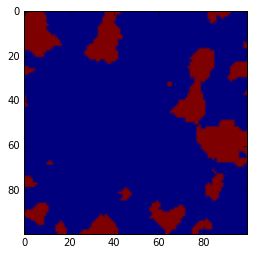

In [19]:
plt.imshow(msk)

In [8]:
#listeciel = (308,354,560,587,666,852,6312,6313,6319,6324,6326)
#listeechec=(193,  227,  228,  287 , 349 , 394 , 406 , 421,  493,  518 , 533 , 663 , 690 , 705,  779, 6300 ,6305 ,6318, 6328, 6332 ,6338 )
#listeciel = (308, 354, 417,459,518,587,701,718,852,6311,6312,6313,6317,6326,6332, 259,728,)
#listeechec = (193,228,270,287,338,349,375,472,493,533,560,651,663,779,817,6300,6305,6318,6319,6330,6338, 131,221,304,321,458,590,603,649,6306,6309,6322,6333,6334,300)
# attention aux bords la distinction n'est plus faite entre ciel et echec

###################
# Listes variées
liste_floriane = (63,  78, 106, 109, 148, 149, 153, 157, 171, 180, 183, 214, 242, 279, 308, 357, 364, 374, 378, 400, 417, 467, 547, 559, 663, 837)

liste_ok = (50,63,78,82,97,106,109,118,143,148,149,163,171,183,204,208,214,218,237,261,263, 275,298,306,313,324,336,344,357,360,378,391,399,400,417,430,469,489,494,510,559,590,619,627,642,660,666,702,703,723,828, 6290,6291,6293,6297,6298,6299,6303,6304,6316,6321,6323,6327,6329,6334,6340,6342)

#taille80 = (106,109,111,118,143,153,168,180,261,277,279,299,305,306, 313,314,318,344,364,374,399,422,459,489,547,633,666,723,6291,6298, 6301,6313,6316,6339,6340,6343,)
taille80_bis = (242,321,412,467,590,591,669,736,802,6295,6300,6308,6311,6333, 6342)


#ok = 
taille40 = (6318,6337,6341,666,)

taille50 = (263,308,385,469,579,605,619,702,703,6319,6324,6325,305)

taille100 = (111,153,277,314,357,442,718,6294,6335)

taille70 = (106,430,642,118,279,313,318,374,489,633,723,6291,6313)

lambda_coupe_droite_5 = (171,255,426,505,6334,627,705,6305,255)
lambda_plus_7 = (417,852,6321)
lambda_coupe_droite_gauche_5 = (336,) 
lambda_plus_large = (50,97,6329,)

liste_a_proc = lambda_coupe_droite_5+lambda_plus_7+lambda_plus_large+lambda_coupe_droite_gauche_5


###########

liste_echec = (184,125,193,270,287,300,319,338,349,372,375,394,406,421,458,459,472,493,533,560,649,651,663,779,817,837,6307,6320,6322,6301,6338,6343)

liste_ciel = (168,259,304,354,418,518,587,603,701,791,728,6306,6309,6312,6317,6326,6331,6332,6339)

In [9]:
sourcelist = list()
numobj = 0
listez = list()
#liste_id = cat_lya['ID']
for id in liste_floriane:
    try:
        src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
        sourcelist.append(src)
        
        numobj+=1

        listez.append(src.z[0][0])
    except:
        pass

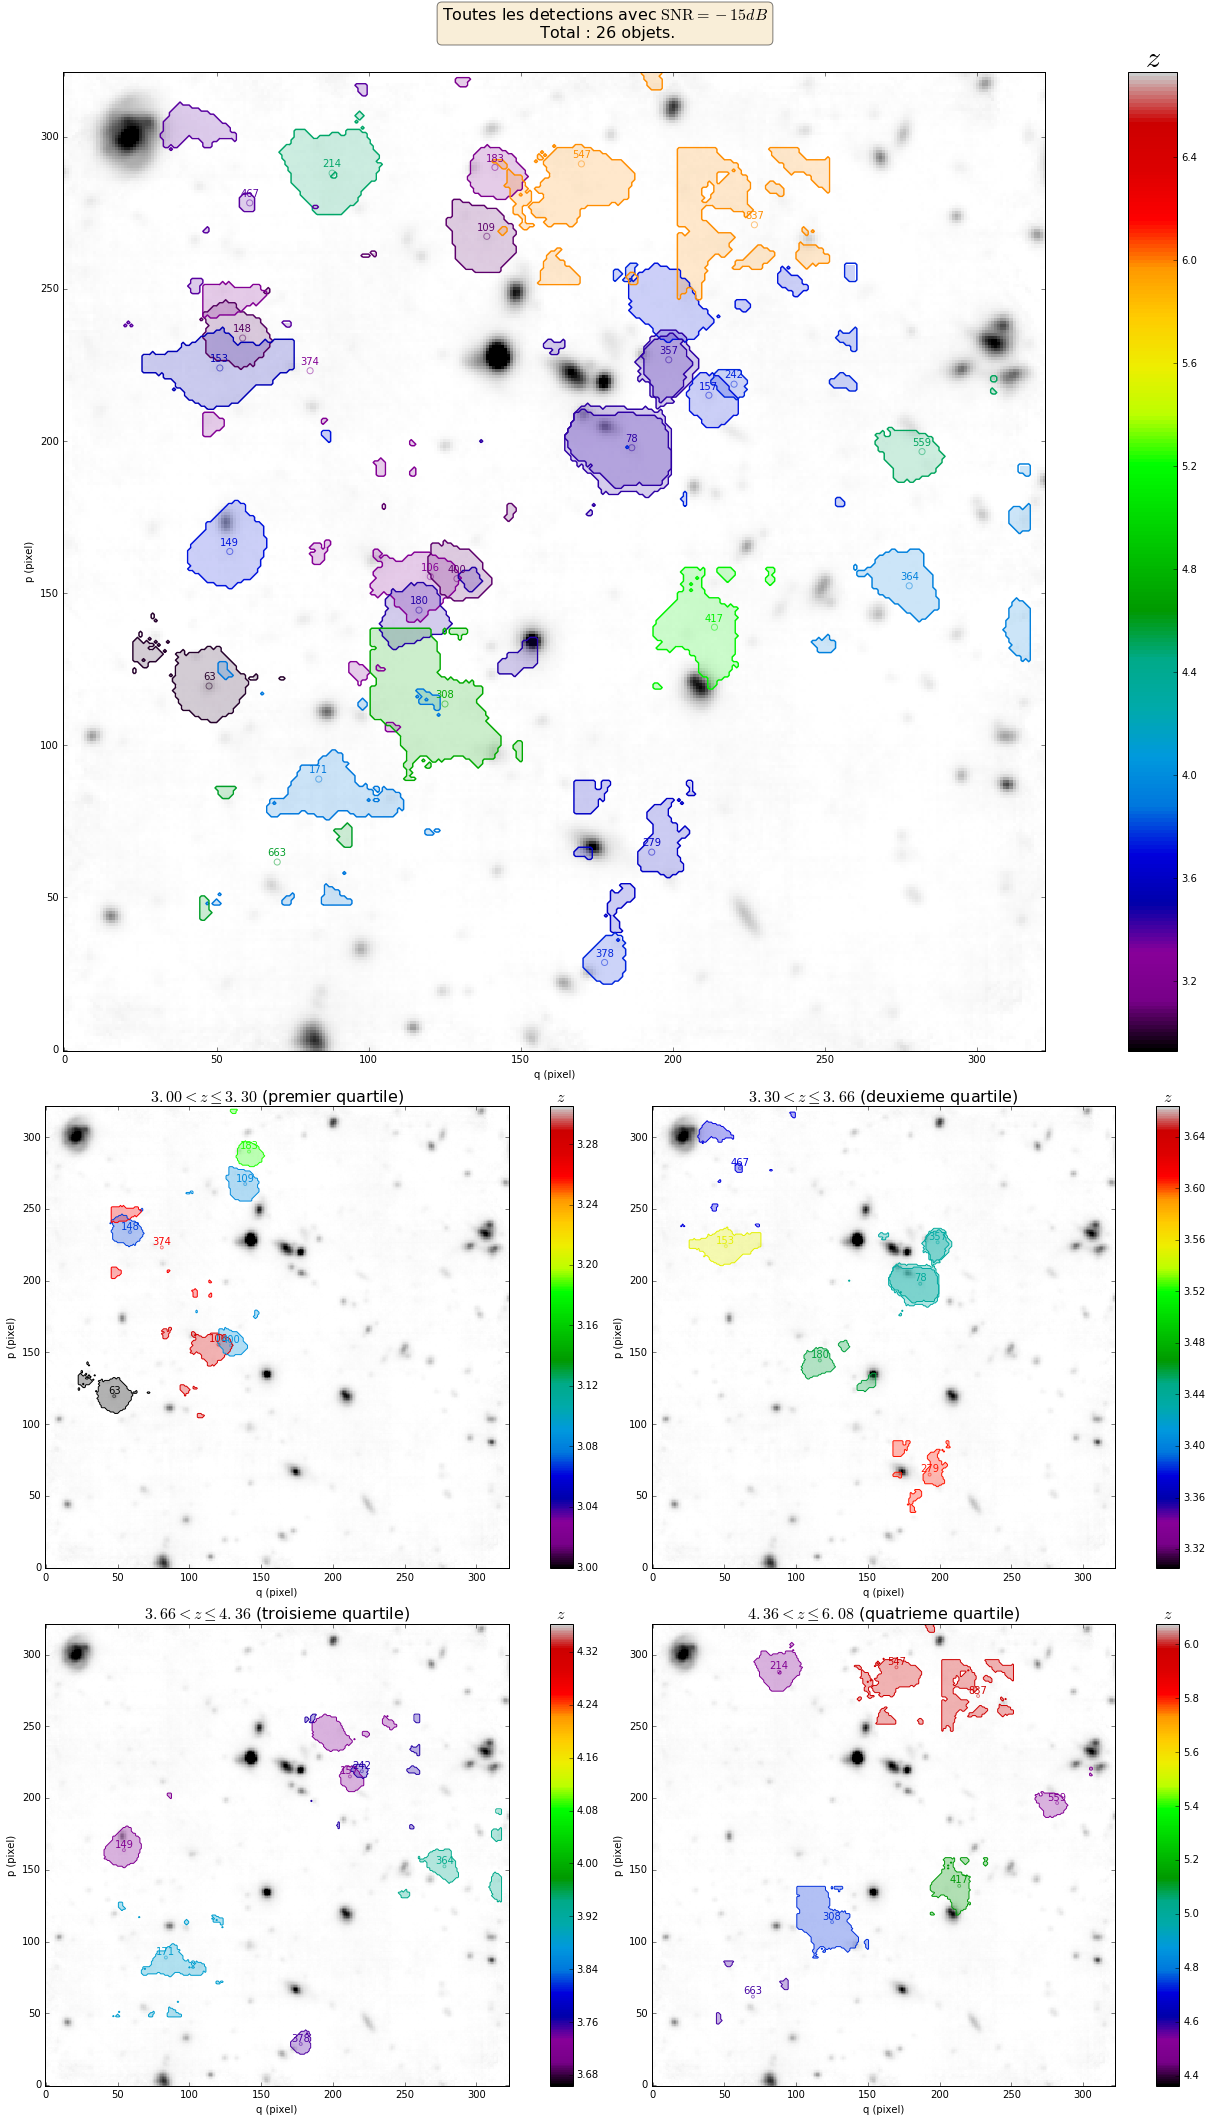

In [10]:
import numpy.ma as ma
fig = plt.figure(figsize=(17,30))
cm_r = plt.cm.nipy_spectral
decal = 25
shapemax = np.array([im_cube.data.data.shape[0]+2*decal, im_cube.data.data.shape[1]+2*decal])

plt.subplot(4,2,(1,4))

zmin_tout = cat_lya['Z_MUSE'].min()
zmax_tout = cat_lya['Z_MUSE'].max()+0.1
dumb = zmin_tout * np.ones_like(im_cube.data.data) ; dumb[0,0] = zmax_tout
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=30)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')


zrange = np.array([zmin_tout,3.4,3.75,5,zmax_tout])
zrange = np.percentile(listez,(0,25,50,75,100)) ; zrange[-1] +=0.1

ax = plt.subplot(4,2,5)
dumb = zrange[0] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[1]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (premier quartile)'%(zrange[0],zrange[1]),fontsize=16)


ax = plt.subplot(4,2,6)
dumb = zrange[1] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[2]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (deuxieme quartile)'%(zrange[1],zrange[2]),fontsize=16)

ax = plt.subplot(4,2,7)
dumb = zrange[2] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[3]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (troisieme quartile)'%(zrange[2],zrange[3]),fontsize=16)

ax = plt.subplot(4,2,8)
dumb = zrange[3] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[4]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (quatrieme quartile)'%(zrange[3],zrange[4]),fontsize=16)

cm = matplotlib.cm.get_cmap('nipy_spectral')

wcs_ref = im_cube.wcs

nb_obj = 0

for src in sourcelist:
    try:



        im = src.images['SEG_HMF']
        z = src.z[0][0]
        start_radec, end_radec = im.get_start(), im.get_end()
        start_pix = wcs_ref.sky2pix(start_radec)[0].astype(int)
        end_pix = start_pix + im.data.data.shape

        #if src.id not in listeciel:
        #    if src.id not in listeechec:


        zmin = cat_lya['Z_MUSE'].min()
        zmax = cat_lya['Z_MUSE'].max()+0.1
        znorm = (z-zmin)/(zmax-zmin)

        image_tout = np.zeros(shape=shapemax)
        image_tout[decal+start_pix[0]:decal+end_pix[0], decal+start_pix[1]:decal+end_pix[1]] = im.data.data
        image_tout = ma.masked_array(image_tout,mask=image_tout==0)

        # crop aux dimensions initiales
        image_tout = image_tout[decal:-decal,decal:-decal]

        col = cm(znorm)

        ax=plt.subplot(4,2,(1,4))
        cat[cat['ID']==src.id].plot_id(ax,im_cube.wcs,col=col)
        ax.contourf(image_tout,1, colors=(cm(znorm),),alpha=0.20)
        ax.contour(image_tout.data,1, colors=(cm(znorm),),linewidths=1.5)


        # plot sous bande

        #z = src.z[0][0]

        if z <= zrange[1]:
            ax=plt.subplot(4,2,5)
            zmin = zrange[0]
            zmax = zrange[1]
        elif z > zrange[1] and z<=zrange[2]:
            ax=plt.subplot(4,2,6)
            zmin = zrange[1]
            zmax = zrange[2]

        elif z > zrange[2] and z<=zrange[3]:
            ax=plt.subplot(4,2,7)
            zmin = zrange[2]
            zmax = zrange[3]
        elif z > zrange[3]:
            ax=plt.subplot(4,2,8)
            zmin = zrange[3]
            zmax = zrange[4]

        znorm = (z-zmin)/(zmax-zmin)
        col = cm(znorm)
        cat[cat['ID']==src.id].plot_id(ax,im_cube.wcs,col=col)

        #print znorm
        ax.contourf(image_tout,1, colors=(cm(znorm),),alpha=0.30)
        ax.contour(image_tout.data,1, colors=(cm(znorm),))

        nb_obj+=1
    except:
        pass    
    
    
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
texte = 'Toutes les detections avec $\mathrm{SNR} = -15dB$ \n Total : %.0f objets.'%nb_obj
plt.suptitle(texte, bbox=props,fontsize=16)    
    
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('./data/udf10_lya_sources_v0/synth_all.pdf')

In [11]:
########################################
# Catalogue
########################################

sourcelist = list()
numobj = 0

liste_id = cat_lya['ID']
for id in liste_floriane:
    try:
        src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
        sourcelist.append(src)
        numobj+=1

    except:
        pass


doc_pdf = PdfPages('./data/udf10_lya_sources_v0/catalogue.pdf')

nb_li = 4
nb_col = 3
plt.figure(figsize=(nb_col*6,nb_li*6))
numobj = 0
for src in sourcelist:#(sourcelist[0],):    
    
    try:

        fig = plt.figure(figsize=(nb_col*4,nb_li*4))
        cg = plt.cm.magma_r


        ############################################
        ###### Title
        ############################################

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        texte = 'HMF\nID #%d \n z = %.3f '%(src.id, src.z[0][0])
        plt.suptitle(texte, bbox=props,fontsize=14)


        ############################################
        ###### Plot White + Catalog
        ############################################
        ax=plt.subplot(nb_li,nb_col,1)
        im_wh = src.images['WHITE']
        cat2=cat.select(im_wh.wcs)
        cat_lya2=cat_lya.select(im_wh.wcs)
        ecart_z = np.abs(cat_lya2['Z_MUSE']-src.z[0][0])
        cat_lya2=cat_lya2[ecart_z < 0.05]


        im_wh.plot(cmap=cg,title='Subcube white image.\n Blue: LAE with $|z-z_{%.0f}|<0.05$.'%src.id)
        cat2.plot_id(ax,im_wh.wcs)
        cat_lya2.plot_id(ax,im_wh.wcs,col='blue')



        ############################################
        ###### Plot Mask + Catalog
        ############################################
        ax=plt.subplot(nb_li,nb_col,2)
        im_wh_ms = src.images['WHITE_MS']

        im_wh_ms.plot(title='After median substraction \n(used for segmentation)',cmap=cg, vmin=im_wh.data.data.min(),vmax = im_wh.data.data.max(),)
        cat2.plot_id(ax,im_wh_ms.wcs)
        cat_lya2.plot_id(ax,im_wh_ms.wcs,col='blue')

        ############################################
        ###### Plot segmentation (+ catalog?) + FSF if possible
        ############################################
        ax = plt.subplot(nb_li,nb_col,5)
        im_seg = src.images['SEG_HMF']
        im_seg.data.mask = im_seg.data==0
        im_seg.plot( cmap=plt.cm.autumn,title='HMF segmentation',vmin=-1,vmax=2.)

        cat_lya2.plot_id(ax,im_seg.wcs,col='blue')

        ############################################
        ###### Plot segmentation uncertainty
        ############################################
        plt.subplot(nb_li,nb_col,6)
        src.images['USEG_HMF'].plot(cmap=plt.cm.gray,title='Uncertainties w.r.t. HMF segmentation',vmin=0,vmax=1)

        ############################################
        ###### Plot estimated spectra
        ############################################
        ax=plt.subplot(nb_li,nb_col,7)
        try:
            sp_sem = src.spectra['SP_SEM']
        except:
            sp_sem = src.spectra['sp_sem']

        sp_sem.plot()
        plt.xlim(sp_sem.get_start(),sp_sem.get_end()) ; plt.grid()
        plt.title('Prior estimation of $\\mu$')




        ############################################
        ###### Plot summed flux / spectrum
        ############################################
        ax=plt.subplot(nb_li,nb_col,8)
        try:
            sp_sum = src.spectra['SP_SUM']
        except:
            sp_sum = src.spectra['sp_sum']    

        sp_sum.plot()
        plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()
        plt.title('Summed flux (with med. sub.)')


        ############################################
        ###### Same on the real source (without med. sub.)
        ############################################
        ax=plt.subplot(nb_li,nb_col,9)
        try:
            sp_sum = src.spectra['SP_SUM_NOMS']
        except:
            sp_sum = src.spectra['sp_sum_noms']    

        sp_sum.plot()
        plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()
        plt.title('Summed flux (without med. sub.)')

        ############################################
        ###### Segmentation with separated objects
        ############################################            
        #ax=plt.subplot(nb_li,nb_col,10)
        im2 = im_seg.copy()
        num_feat = ndi.label(im_seg.data.data,output=im2.data)
        im2.data.mask=(im2.data==0)
        c= 0
        for feat in range(1,num_feat+1):
            msk = (im2.data==feat)
            if msk.sum() > 20:
                c +=1
        listesurf=''
        if c > 1:
            ax=plt.subplot(nb_li,nb_col,10)
            im2.plot(cmap=plt.cm.brg)
            plt.title('Object separation')

            ############################################
            ###### Plot object-wise summed flux / spectrum
            ############################################
            ax=plt.subplot(nb_li,nb_col,11)
            cmap= matplotlib.cm.get_cmap('brg')


            for feat in range(1,num_feat+1):
                msk = (im2.data==feat)
                if msk.sum() > 20:
                    cubemask = src.cubes['CUBE_MS']
                    cubemask.data.mask=msk==0
                    cubemask.sum(axis=(1,2)).plot(color=cmap((feat-1.)/float(num_feat-1)))
            plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()               
            plt.title('Summed flux (with med. sub)')



            ############################################
            ###### same w/out med sub
            ############################################
            ax=plt.subplot(nb_li,nb_col,12)
            cmap= matplotlib.cm.get_cmap('brg')

            for feat in range(1,num_feat+1):
                msk = (im2.data==feat)

                if msk.sum() > 20:
                    listesurf=listesurf+str(msk.sum())+'+'
                    cubemask = src.cubes['CUBE']
                    cubemask.data.mask=msk==0
                    cubemask.sum(axis=(1,2)).plot(color=cmap((feat-1.)/float(num_feat-1)))
                    
            plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()               
            plt.title('Summed flux (without med. sub)')

        ############################################
        ###### Print all quantitative info.
        ############################################
        ax=plt.subplot(nb_li,nb_col,4)
        surface= (src.images['SEG_HMF'].data>0).sum()
        l1 = '$\mathrm{SNR} = %.2f~\\mathrm{dB}$\n\n'# $10^{-20}erg / (A.cm^2.s)$ \n\n'
        l2 = 'Estimation prior to segmentation:\n'
        l3= '$\\sigma=%.4f$ \n$\\rho_1=%.4f$ \n$\\rho_2=%.4f$ \n\n'
        l4 = 'Detected surface: \n$S=%.0f~\\mathrm{px}$\n'
        if listesurf=='':
            l5 = ''
        else:
            l5 = '$\\simeq '+listesurf[:-1]+'$ pixels'
            
        ax.text(0.1,0.1,(l1+l2+l3+l4+l5)%(src.psnr,src.sig_sem,src.rho1,src.rho2,surface),fontsize=12)

        plt.axis('off')                 


        ######### end the iteration over sources/pdf page

        plt.tight_layout()

        plt.subplots_adjust(top=0.85)
        doc_pdf.savefig(fig)
        plt.close(fig)
    except:
        print "erreur !"
        pass


doc_pdf.close()

In [90]:
## Comptage des détections, non-détections...

sourcelist = list()

listez = list()
liste_id = cat_lya[id_nobor==0]['ID']

nb_obj_conf_ok = 0
nb_obj_conf_non_ok = 0
nb_obj = 0

for id in cat_lya['ID']:
    try:
        if id not in listeciel:
            if id not in listeechec:
                src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
                im = src.images['SEG_HMF']
                
                catloc= cat_lya[cat_lya['ID']==id]
                confid = catloc['CONFID'][0]
                
                nb_obj+=1
                if confid > 1:
                    nb_obj_conf_ok +=1
                elif confid==1:
                    nb_obj_conf_non_ok +=1

    except:
        pass

In [65]:
nb_obj_total = cat_lya['ID'].size
nb_obj_bord = cat_lya[id_nobor==0]['ID'].size
nb_obj_ciel = len(listeciel)
nb_obj_traite = 81#nb_obj_total - nb_obj_bord - nb_obj_ciel - nb_obj_echec
nb_obj_echec = nb_obj_total - nb_obj_bord - nb_obj_ciel - nb_obj_traite#len(listeechec)
print nb_obj_total,nb_obj_bord,nb_obj_ciel,nb_obj_echec, nb_obj_traite
print 100*np.array([nb_obj_total,nb_obj_bord,nb_obj_ciel,nb_obj_echec, nb_obj_traite])/float(nb_obj_total)

183 49 15 38 81
[ 100.           26.77595628    8.19672131   20.76502732   44.26229508]


In [112]:
total_conf_non_ok = cat_lya[cat_lya['CONFID']==1]['ID'].shape[0]
compl_conf_non_ok = 100*float(nb_obj_conf_non_ok)/total_conf_non_ok

total_conf_ok = cat_lya[cat_lya['CONFID']>1]['ID'].shape[0]
compl_conf_ok = 100*float(nb_obj_conf_ok)/total_conf_ok

total = cat_lya['ID'].shape[0]
compl_total = 100*float(nb_obj)/total

print 'Nb objets traites en tout :       %.0f / %.0f soit %.2f p. de completion'%(nb_obj,total,compl_total)
print 'Nb objets traites avec conf > 1 : %.0f / %.0f soit %.2f p. de completion'%(nb_obj_conf_ok, total_conf_ok, compl_conf_ok )
print 'Nb objets traites avec conf = 1 : %.0f / %.0f soit %.2f p. de completion'%(nb_obj_conf_non_ok, total_conf_non_ok,compl_conf_non_ok)

# Nb. Catégoriser les irrécupérables de résidus du ciel des autres !

Nb objets traites en tout :       111 / 183 soit 60.66 p. de completion
Nb objets traites avec conf > 1 : 107 / 157 soit 68.15 p. de completion
Nb objets traites avec conf = 1 : 4 / 26 soit 15.38 p. de completion


In [128]:
sourcelist = list()
numobj = 0

for id in liste_ok:
    try:
        src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
        #if id not in liste_obj_bor:
        sourcelist.append(src)
        numobj+=1

    except:
        pass
print numobj

67


In [151]:
########################################
# Calculs de stats diverses
########################################
from skimage import measure
import scipy.ndimage.morphology as morph


surfaces = np.array([])
perims = np.array([])
redshifts = np.array([])
excen = np.array([])
ras = np.array([])
decs = np.array([])

ind_bords = np.array([])
for src in sourcelist:
    #try:
        #src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
        im = src.images['SEG_HMF'].data>0
        

        # a) pixel à 1 au centroide de l'image initiale
        center = np.round(measure.regionprops(im)[0].centroid).astype(int)
        cpix = np.zeros_like(im)
        cpix[center[0],center[1]] = 1

        # b) on ne garde dans la segmentation que les pixels connexes au pixel central
        im2 = morph.binary_propagation(cpix,mask=im)
        
        #c) Extraction des mesures
        props = measure.regionprops(im2)[0]
        if props.area > 1:
            

            perims = np.append(perims,props.perimeter)
            surfaces = np.append(surfaces,props.area)
            excen = np.append(excen,props.eccentricity)

            #print src.id,props.area

            redshifts = np.append(redshifts,(src.z[0][0]))
            ras = np.append(ras,src.ra)
            decs = np.append(decs,src.dec)
            
            if src.id in liste_obj_bor:
                ind_bords = np.append(ind_bords, [1])
            else:
                ind_bords = np.append(ind_bords, [0])

    #except:
    #    pass
    
mes = 4*np.pi*surfaces/(perims**2) 

In [152]:
print redshifts.shape
print ind_bords.shape

(61,)
(61,)


In [53]:
src.dec

-27.78132311578793

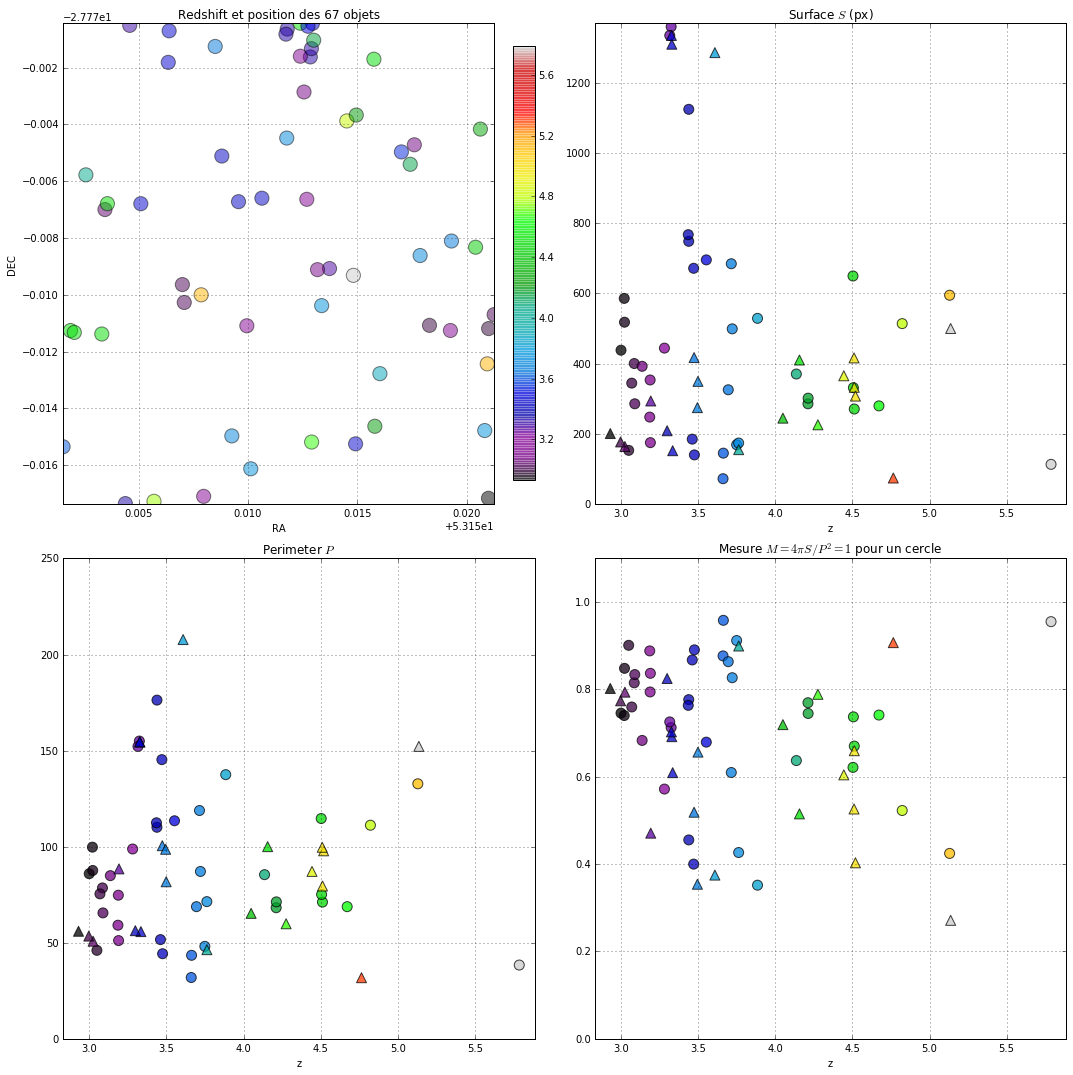

In [183]:
plt.figure(figsize=(15,15))
nb_li = 2
nb_col = 2

zmin = redshifts.min()-0.1 ; zmax = redshifts.max()+0.1


r0 = redshifts[ind_bords==0] ; r1 = redshifts[ind_bords==1]
s0 = surfaces[ind_bords==0] ; s1 = surfaces[ind_bords==1]
p0 = perims[ind_bords==0] ; p1 = perims[ind_bords==1]
m0 = mes[ind_bords==0] ; m1 = mes[ind_bords==1]

plt.subplot(nb_li,nb_col,1)
plt.scatter(ras,decs,c=redshifts,s=200,alpha=0.5); plt.spectral();plt.colorbar(fraction=0.046,pad=0.04)
plt.xlabel('RA'); plt.ylabel('DEC');plt.title('Redshift et position des %.0f objets'%numobj)
plt.xlim(ras.min(),ras.max()) ; plt.ylim(decs.min(),decs.max()) ; plt.grid()

plt.subplot(nb_li,nb_col,2)
plt.scatter(r0, s0, c=r0,s=100, alpha=0.75); plt.spectral()
plt.scatter(r1,s1,c=r1,s=100,marker='^', alpha=0.75); plt.spectral()
plt.xlabel('z'); plt.title('Surface $S$ (px)')
plt.ylim(0,surfaces.max()+10) ; plt.xlim(zmin,zmax) ; plt.grid()

plt.subplot(nb_li,nb_col,3)
plt.scatter(r0, p0, c=r0,s=100, alpha=0.75); plt.spectral()
plt.scatter(r1,p1,c=r1,s=100,marker='^', alpha=0.75); plt.spectral()
plt.xlabel('z'); plt.title('Perimeter $P$')
plt.ylim(0,None) ; plt.xlim(zmin,zmax) ; plt.grid()

plt.subplot(nb_li,nb_col,4)
plt.scatter(r0, m0, c=r0,s=100, alpha=0.75); plt.spectral()
plt.scatter(r1,m1,c=r1,s=100,marker='^', alpha=0.75); plt.spectral()
plt.xlabel('z'); plt.title('Mesure $M=4\pi S / P^2 = 1$ pour un cercle')
plt.ylim(0,None) ; plt.xlim(zmin,zmax) ; plt.grid()


plt.tight_layout()

plt.savefig('./data/udf10_lya_sources_v0/mesures_preliminaires.pdf')

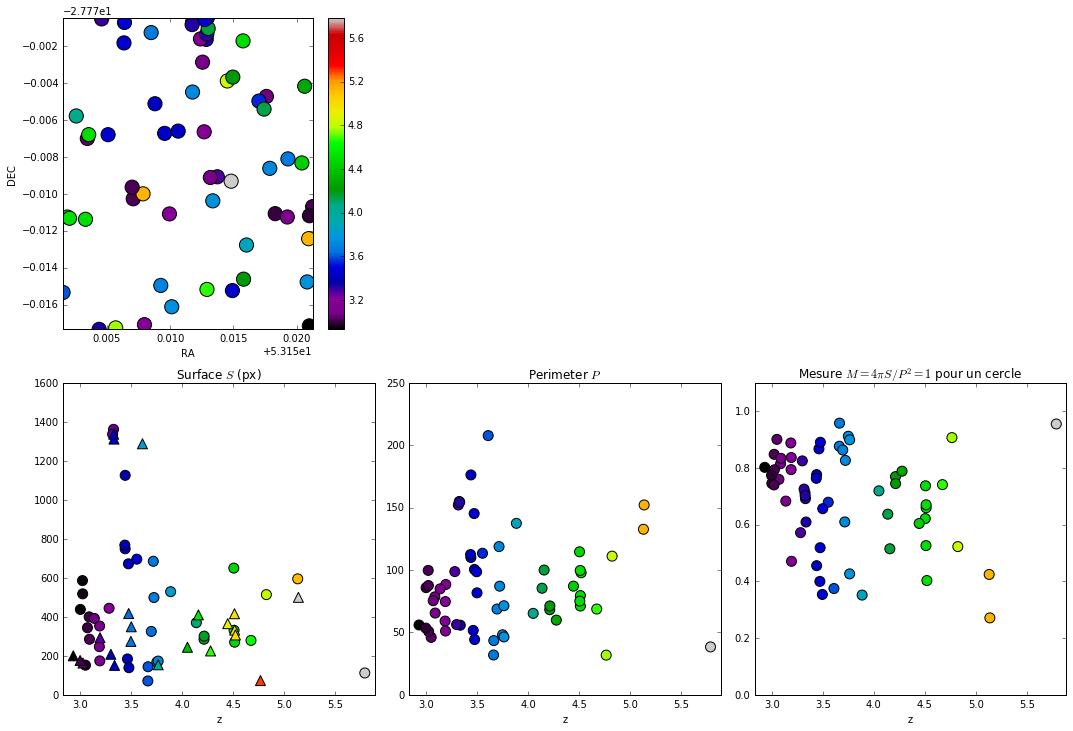

In [153]:
#
#plt.subplot(nb_li,nb_col,2*nb_col+1)
#plt.scatter(ras,surfaces, c=redshifts,s=100); plt.spectral()
#plt.xlabel('RA'); plt.title('Surface $S$ (px)')
#plt.ylim(0,None) ; plt.xlim(ras.min(),ras.max())
#
#plt.subplot(nb_li,nb_col,2*nb_col+2)
#plt.scatter(ras,perims, c=redshifts,s=100); plt.spectral()
#plt.xlabel('RA'); plt.title('Perimeter $P$')
#plt.ylim(0,None) ; plt.xlim(ras.min(),ras.max())
#
#plt.subplot(nb_li,nb_col,2*nb_col+3)
#plt.scatter(ras,mes, c=redshifts,s=100); plt.spectral()
#plt.xlabel('RA'); plt.title('Mesure $M=4\pi S / P^2 = 1$ pour un cercle')
#plt.ylim(0,None) ; plt.xlim(ras.min(),ras.max())
#
#
#
#plt.subplot(nb_li,nb_col,3*nb_col+1)
#plt.scatter(decs,surfaces, c=redshifts,s=100); plt.spectral()
#plt.xlabel('DEC'); plt.title('Surface $S$ (px)')
#plt.ylim(0,None) ; plt.xlim(decs.min(),decs.max())
#
#plt.subplot(nb_li,nb_col,3*nb_col+2)
#plt.scatter(decs,perims, c=redshifts,s=100); plt.spectral()
#plt.xlabel('DEC'); plt.title('Perimeter $P$')
#plt.ylim(0,None) ; plt.xlim(decs.min(),decs.max())
#
#plt.subplot(nb_li,nb_col,3*nb_col+3)
#plt.scatter(decs,mes, c=redshifts,s=100); plt.spectral()
#plt.xlabel('DEC'); plt.title('Mesure $M=4\pi S / P^2 = 1$ pour un cercle')
#plt.ylim(0,None) ; plt.xlim(decs.min(),decs.max())
#
#plt.subplot(nb_li,nb_col,5)
#plt.plot(ras,mes,'o')
#plt.xlabel('RA'); plt.title('Mesure $M$')
#plt.ylim(0,None) ; #plt.xlim(zmin,zmax)
#
#
#
##plt.subplot(nb_li,nb_col,4)
##plt.plot(redshifts,excen,'o')
##plt.xlabel('z'); plt.title('Eccentricity (ratio petit axe/grand axe)')
##plt.ylim(0,None) ; plt.xlim(zmin,zmax)
#
#
#
#plt.subplot(nb_li,nb_col,7)
#plt.plot(redshifts,ras,'o')
#plt.xlabel('z'); plt.title('RA')
#plt.xlim(zmin,zmax)
#
#plt.subplot(nb_li,nb_col,8)
#plt.plot(redshifts,decs,'o')
#plt.xlabel('z'); plt.title('DEC')
#plt.xlim(zmin,zmax)
#

plt.tight_layout()

/home/miv/courbot/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 61 but corresponding boolean dimension is 62
  if __name__ == '__main__':
/home/miv/courbot/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 61 but corresponding boolean dimension is 62
  from IPython.kernel.zmq import kernelapp as app


IndexError: index 61 is out of bounds for axis 1 with size 61

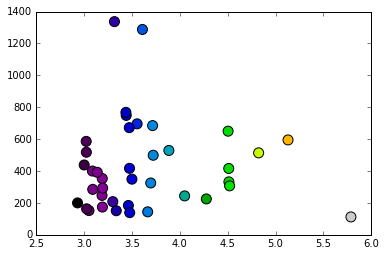

In [145]:
plt.scatter(redshifts[ind_bords==0],surfaces[ind_bords==0], c=redshifts[ind_bords==0],s=100); plt.spectral()
plt.scatter(redshifts[ind_bords==1],surfaces[ind_bords==1], c=redshifts[ind_bords==1],s=100,marker='^'); plt.spectral()

In [147]:
redshifts.shape

(61,)

[-27.78132312  53.15206405]
[[  20.  283.]]
85.9116882454
438.0
0.424659352542


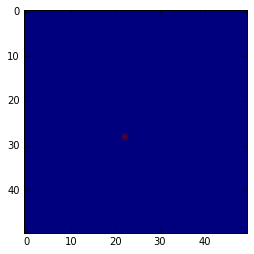

In [66]:
import scipy.ndimage.morphology as morph
im = sourcelist[1].images['SEG_HMF'].data>0

wcs = sourcelist[1].images['SEG_HMF'].wcs
dec_ra = np.array([src.dec,src.ra])


# a) pixel à 1 au centroide de l'image initiale
center = np.round(measure.regionprops(im)[0].centroid).astype(int)
cpix = np.zeros_like(im)
cpix[center[0],center[1]] = 1

# b) on ne garde dans la segmentation que les pixels connexes au pixel central
im2 = morph.binary_propagation(cpix,mask=im)

       
print dec_ra
print wcs.sky2pix(dec_ra)

props = measure.regionprops(im2)[0]
print props.perimeter
print props.area
print props.eccentricity

plt.imshow(cpix)
#sourcelist[1].images['SEG_HMF'].plot()

(array([  1.,   2.,  10.,   7.,   6.,   4.,   1.,   8.,   3.,   4.,  10.,
          3.,   2.,   3.,   3.]),
 array([ 0.15945563,  0.21270817,  0.26596071,  0.31921325,  0.37246579,
         0.42571832,  0.47897086,  0.5322234 ,  0.58547594,  0.63872848,
         0.69198102,  0.74523355,  0.79848609,  0.85173863,  0.90499117,
         0.95824371]),
 <a list of 15 Patch objects>)

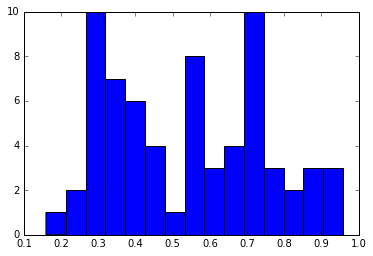

In [46]:
plt.hist(mes,15)

In [23]:
########################################
# Calcul du RSB
########################################

rsbarr = np.array([])


for id in cat_lya['ID']:
    try:
        src= Source.from_file('./data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')

        
        spectre = src.spectra['SP_SEM'].data.data
        Lambda = spectre.size
        sigma = src.sig_sem
        
        rsb_dec = np.linalg.norm(spectre)**2/(Lambda*sigma**2)
        rsb = 10*np.log10(rsb_dec)
        
        rsbarr=np.append(rsbarr, rsb)
    except:
        pass

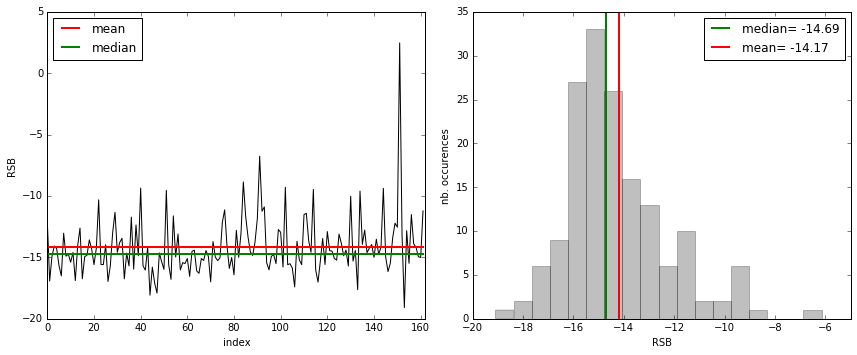

In [56]:
plt.figure(figsize=(12,5))

med = np.median(rsbarr)
mea = np.mean(rsbarr)

plt.subplot(121)
plt.plot(rsbarr,'k')
plt.plot(mea*np.ones_like(rsbarr),'r',label='mean',linewidth=2)
plt.plot(med*np.ones_like(rsbarr),'g',label='median',linewidth=2)
plt.legend(loc='best')
plt.xlabel('index') ; plt.ylabel('RSB'); plt.xlim(0,rsbarr.size)
plt.subplot(122)
plt.hist(rsbarr,30,facecolor='k',alpha=0.25)
plt.plot( (med,med), (0,35) ,'g',label='median= %.2f'%med,linewidth=2)
plt.plot( (mea,mea), (0,35) ,'r',label='mean= %.2f'%mea,linewidth=2)
plt.legend(loc='best')
plt.xlabel('RSB'); plt.ylabel('nb. occurences')
plt.xlim(-20,-5)
plt.tight_layout()

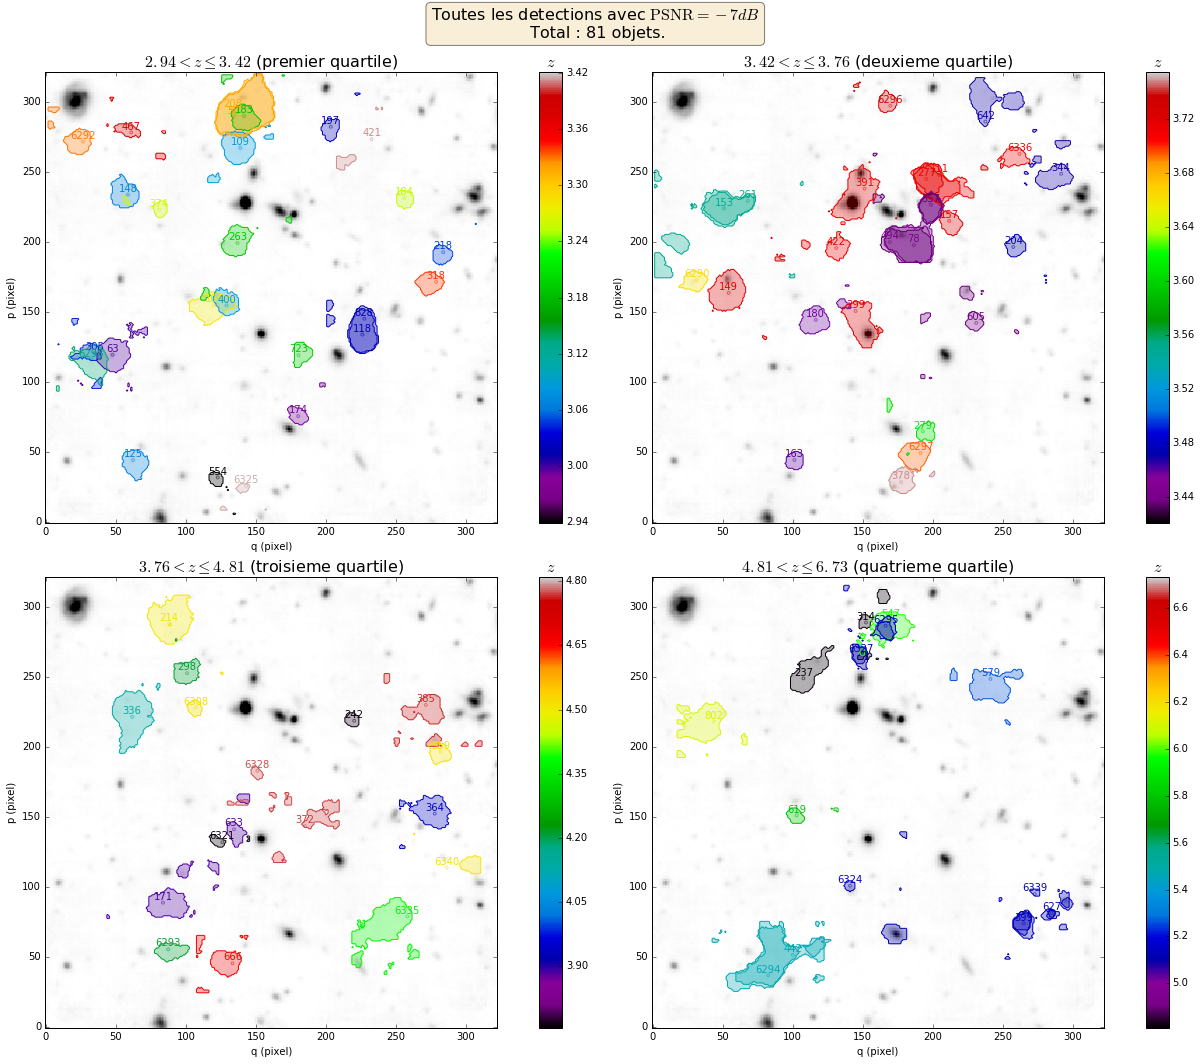

In [38]:
import numpy.ma as ma
fig = plt.figure(figsize=(17,15))

zmin_tout = cat_lya['Z_MUSE'].min()
zmax_tout = cat_lya['Z_MUSE'].max()+0.1

#zrange = np.array([zmin_tout,3.4,3.75,5,zmax_tout])
zrange = np.percentile(listez,(0,25,50,75,100)) ; zrange[-1] +=0.1
ax = plt.subplot(2,2,1)
cm_r = plt.cm.nipy_spectral

dumb = zrange[0] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[1]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (premier quartile)'%(zrange[0],zrange[1]),fontsize=16)


ax = plt.subplot(2,2,2)
dumb = zrange[1] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[2]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (deuxieme quartile)'%(zrange[1],zrange[2]),fontsize=16)

ax = plt.subplot(2,2,3)
dumb = zrange[2] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[3]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (troisieme quartile)'%(zrange[2],zrange[3]),fontsize=16)

ax = plt.subplot(2,2,4)
dumb = zrange[3] * np.ones_like(im_cube.data.data) ; dumb[0,0] = zrange[4]
plt.imshow(dumb, cmap=cm_r) ; clb = plt.colorbar(fraction=0.046,pad=0.04); clb.ax.set_title('$z$',fontsize=16)
im_cube.plot(vmin=0,vmax=5,cmap='gray_r')
plt.title('$%.2f < z \leq %.2f$ (quatrieme quartile)'%(zrange[3],zrange[4]),fontsize=16)

cm = matplotlib.cm.get_cmap('nipy_spectral')

wcs_ref = im_cube.wcs

nb_obj = 0

for src in sourcelist:
    try:
        im = src.images['SEG_HMF']
        z = src.z[0][0]

        if z <= zrange[1]:
            ax=plt.subplot(2,2,1)
            zmin = zrange[0]
            zmax = zrange[1]
        elif z > zrange[1] and z<=zrange[2]:
            ax=plt.subplot(2,2,2)
            zmin = zrange[1]
            zmax = zrange[2]

        elif z > zrange[2] and z<=zrange[3]:
            ax=plt.subplot(2,2,3)
            zmin = zrange[2]
            zmax = zrange[3]
        elif z > zrange[3]:
            ax=plt.subplot(2,2,4)
            zmin = zrange[3]
            zmax = zrange[4]

        start_radec, end_radec = im.get_start(), im.get_end()

        #print start_radec
        start_pix = wcs_ref.sky2pix(start_radec)[0].astype(int)
        end_pix = start_pix + im.data.data.shape
        #print start_pix
        #print end_pix
        if src.id not in listeciel:
            if src.id not in listeechec:
                image_tout = np.zeros_like(im_cube.data.data)
                image_tout[start_pix[0]:end_pix[0], start_pix[1]:end_pix[1]] = im.data.data
                image_tout = ma.masked_array(image_tout,mask=image_tout==0)

                znorm = (z-zmin)/(zmax-zmin)
                col = cm(znorm)
                cat[cat['ID']==src.id].plot_id(ax,im_cube.wcs,col=col)

                #print znorm
                plt.contourf(image_tout,1, colors=(cm(znorm),),alpha=0.30)
                plt.contour(image_tout.data,1, colors=(cm(znorm),))

                nb_obj+=1
    except:
        pass

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
texte = 'Toutes les detections avec $\mathrm{PSNR} = -7dB$ \n Total : %.0f objets.'%nb_obj
plt.suptitle(texte, bbox=props,fontsize=16)    
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('./data/udf10_lya_sources_v0/synth_all.pdf')

In [222]:
redshifts = np.array([])
surfaces = np.array([0])
for src in sourcelist:
    if src.id not in listeciel:

            r = np.array([src.z[0][0]])
            redshifts = np.append(redshifts,r)



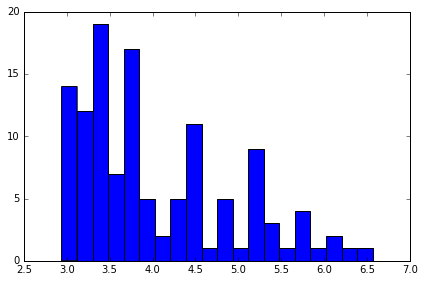

In [231]:
plt.hist(redshifts,20); plt.tight_layout()

In [77]:
cat_lya['Z_MUSE'].min()

2.9297

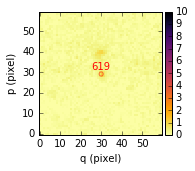

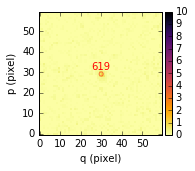

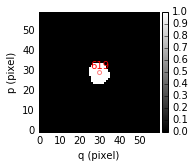

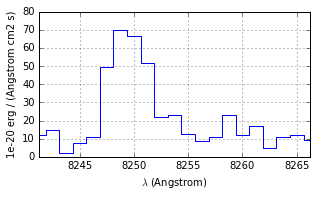

In [88]:
import matplotlib
matplotlib.use('pgf')
pgf_pdflatex = {"pgf.texsystem":"pdflatex"}
matplotlib.rcParams.update(pgf_pdflatex)
import matplotlib.pyplot as plt

src = sourcelist[-4]
cm = plt.cm.inferno_r


plt.figure(figsize=(2.8,2.8))
ax=plt.subplot(111)
im_wh = src.images['WHITE']
cat2=cat.select(im_wh.wcs)
cat_lya2=cat_lya.select(im_wh.wcs)
ecart_z = np.abs(cat_lya2['Z_MUSE']-src.z[0][0])
cat_lya2=cat_lya2[ecart_z < 0.05]


im_wh.plot(cmap=cm,colorbar='v',vmin=0,vmax=10)
#cat2.plot_id(ax,im_wh.wcs)
cat_lya2.plot_id(ax,im_wh.wcs,col='red')
plt.xlabel(''); plt.ylabel(''); plt.tight_layout()
plt.savefig('./figures/obj619_wh.pgf')


plt.figure(figsize=(2.8,2.8))
ax=plt.subplot(111)
im_wh2 = src.images['WHITE_MS']
cat2=cat.select(im_wh.wcs)
cat_lya2=cat_lya.select(im_wh.wcs)
ecart_z = np.abs(cat_lya2['Z_MUSE']-src.z[0][0])
cat_lya2=cat_lya2[ecart_z < 0.05]


im_wh2.plot(cmap=cm,colorbar='v',vmin=0,vmax=10)
#cat2.plot_id(ax,im_wh.wcs)
cat_lya2.plot_id(ax,im_wh.wcs,col='red')
plt.xlabel(''); plt.ylabel(''); plt.tight_layout()
plt.savefig('./figures/obj619_wh_ms.pgf')

plt.figure(figsize=(2.8,2.8))
ax=plt.subplot(111)

im_seg = src.images['SEG_HMF']
im_seg.data.mask = np.zeros_like(im_seg.data.data)

im_seg.plot(ax=ax,colorbar='v',cmap=plt.cm.gray)

cat_lya2.plot_id(ax,im_seg.wcs,col='red')
plt.xlabel(''); plt.ylabel(''); plt.tight_layout()
plt.savefig('./figures/obj619_seg.pgf')
plt.figure(figsize=(4.5,2.8))
ax=plt.subplot(111)

try:
    sp_sum = src.spectra['SP_SUM_NOMS']
except:
    sp_sum = src.spectra['sp_sum_noms']    

sp_sum.plot()
plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()
plt.tight_layout()
plt.savefig('./figures/obj619_sp_noms.pgf')




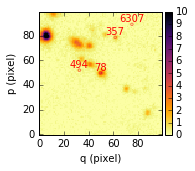

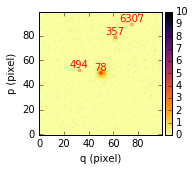

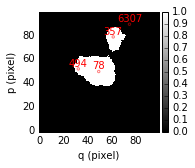

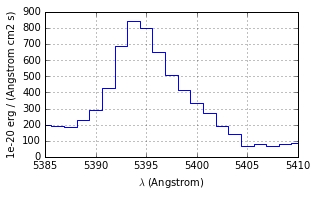

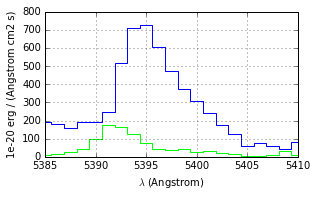

In [89]:
import matplotlib
matplotlib.use('pgf')
pgf_pdflatex = {"pgf.texsystem":"pdflatex"}
matplotlib.rcParams.update(pgf_pdflatex)
import matplotlib.pyplot as plt

src = sourcelist[0]
cm = plt.cm.inferno_r


plt.figure(figsize=(2.8,2.8))
ax=plt.subplot(111)
im_wh = src.images['WHITE']
cat2=cat.select(im_wh.wcs)
cat_lya2=cat_lya.select(im_wh.wcs)
ecart_z = np.abs(cat_lya2['Z_MUSE']-src.z[0][0])
cat_lya2=cat_lya2[ecart_z < 0.05]


im_wh.plot(cmap=cm,colorbar='v',vmin=0,vmax=10)
#cat2.plot_id(ax,im_wh.wcs)
cat_lya2.plot_id(ax,im_wh.wcs,col='red')
plt.xlabel(''); plt.ylabel(''); plt.tight_layout()
plt.savefig('./figures/obj78_wh.pgf')


plt.figure(figsize=(2.8,2.8))
ax=plt.subplot(111)
im_wh2 = src.images['WHITE_MS']
cat2=cat.select(im_wh.wcs)
cat_lya2=cat_lya.select(im_wh.wcs)
ecart_z = np.abs(cat_lya2['Z_MUSE']-src.z[0][0])
cat_lya2=cat_lya2[ecart_z < 0.05]


im_wh2.plot(cmap=cm,colorbar='v',vmin=0,vmax=10)
#cat2.plot_id(ax,im_wh.wcs)
cat_lya2.plot_id(ax,im_wh.wcs,col='red')
plt.xlabel(''); plt.ylabel(''); plt.tight_layout()
plt.savefig('./figures/obj78_wh_ms.pgf')

plt.figure(figsize=(2.8,2.8))
ax=plt.subplot(111)

im_seg = src.images['SEG_HMF']
im_seg.data.mask = np.zeros_like(im_seg.data.data)

im_seg.plot(ax=ax,colorbar='v',cmap=plt.cm.gray)

cat_lya2.plot_id(ax,im_seg.wcs,col='red')
plt.xlabel(''); plt.ylabel(''); plt.tight_layout()
plt.savefig('./figures/obj78_seg.pgf')
plt.figure(figsize=(4.5,2.8))
ax=plt.subplot(111)

try:
    sp_sum = src.spectra['SP_SUM_NOMS']
except:
    sp_sum = src.spectra['sp_sum_noms']    

sp_sum.plot()
plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()
plt.tight_layout()
plt.savefig('./figures/obj78_sp_noms.pgf')


plt.figure(figsize=(4.5,2.8))
ax=plt.subplot(111)

im2 = im_seg.copy()
num_feat = ndi.label(im_seg.data.data,output=im2.data)
cmap= matplotlib.cm.get_cmap('brg')
for feat in range(1,num_feat+1):
    msk = (im2.data==feat)
    if msk.sum() > 20:
        cubemask = src.cubes['CUBE']
        cubemask.data.mask=msk==0
        cubemask.sum(axis=(1,2)).plot(color=cmap((feat-1.)/float(num_feat-1)))
plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()               
plt.tight_layout()
plt.savefig('./figures/obj78_sps_noms.pgf')